# 모두의 딥러닝 20_GAN

https://github.com/gilbutITbook/080228/blob/master/deeplearning/run_project/20_GAN.ipynb

In [17]:
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten, Dropout
from tensorflow.keras.layers import BatchNormalization, Activation, LeakyReLU, UpSampling2D, Conv2D
from tensorflow.keras.models import Sequential, Model
from sklearn.preprocessing import MinMaxScaler, StandardScaler, MaxAbsScaler

import numpy as np
import pandas as pd
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt

import librosa
import librosa.display
import soundfile as sf


In [18]:
#이미지가 저장될 폴더가 없다면 만듭니다.
# import os
# if not os.path.exists("E:\\nmb\\gan_images"):
#     os.makedirs("E:\\nmb\\gan_image")

np.random.seed(3)
tf.random.set_seed(3)

nosie_size = 100
x_size = 68
y_size = 68
gx1 = int(x_size/4)
gy1 = int(y_size/4)

epochs = 401
batch = 16

In [19]:
#생성자 모델을 만듭니다.
generator = Sequential()
generator.add(Dense(128*gx1*gy1, input_dim=nosie_size, activation=LeakyReLU(0.2)))
generator.add(BatchNormalization())
generator.add(Reshape((gx1, gy1, 128)))
generator.add(UpSampling2D())
generator.add(Conv2D(64, kernel_size=5, padding='same'))
generator.add(BatchNormalization())
generator.add(Activation(LeakyReLU(0.2)))
generator.add(UpSampling2D())
# generator.add(Conv2D(1, kernel_size=5, padding='same', activation='tanh'))
# generator.add(Conv2D(1, kernel_size=5, padding='same', activation='relu'))
generator.add(Conv2D(1, kernel_size=5, padding='same', activation='elu'))
generator.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 36992)             3736192   
_________________________________________________________________
batch_normalization_4 (Batch (None, 36992)             147968    
_________________________________________________________________
reshape_2 (Reshape)          (None, 17, 17, 128)       0         
_________________________________________________________________
up_sampling2d_4 (UpSampling2 (None, 34, 34, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 34, 34, 64)        204864    
_________________________________________________________________
batch_normalization_5 (Batch (None, 34, 34, 64)        256       
_________________________________________________________________
activation_6 (Activation)    (None, 34, 34, 64)       

In [20]:
#판별자 모델을 만듭니다.
discriminator = Sequential()
discriminator.add(Conv2D(64, kernel_size=5, strides=2, input_shape=(x_size,y_size,1), padding="same"))
discriminator.add(Activation(LeakyReLU(0.2)))
discriminator.add(Dropout(0.3))
discriminator.add(Conv2D(128, kernel_size=5, strides=2, padding="same"))
discriminator.add(Activation(LeakyReLU(0.2)))
discriminator.add(Dropout(0.3))
discriminator.add(Flatten())
discriminator.add(Dense(1, activation='sigmoid'))

# compile
discriminator.compile(loss='binary_crossentropy', optimizer='adam')
discriminator.trainable = False
# discriminator.trainable = True
discriminator.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 34, 34, 64)        1664      
_________________________________________________________________
activation_7 (Activation)    (None, 34, 34, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 34, 34, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 17, 17, 128)       204928    
_________________________________________________________________
activation_8 (Activation)    (None, 17, 17, 128)       0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 17, 17, 128)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 36992)            

In [21]:
#생성자와 판별자 모델을 연결시키는 gan 모델을 만듭니다.
ginput = Input(shape=(nosie_size,))                    # input
dis_output = discriminator(generator(ginput))   # output
gan = Model(ginput, dis_output)
gan.compile(loss='binary_crossentropy', optimizer='adam')
gan.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
sequential_4 (Sequential)    (None, 68, 68, 1)         4090881   
_________________________________________________________________
sequential_5 (Sequential)    (None, 1)                 243585    
Total params: 4,334,466
Trainable params: 4,016,769
Non-trainable params: 317,697
_________________________________________________________________


In [22]:
# X_train = np.load('E:\\nmb\\nmb_data\\npy\\1m2s\\concate\\total_fm_data.npy')
X_train = np.load('E:\\nmb\\nmb_data\\npy\\2m5s\\project_total_npy\\total_f_data.npy')
print(X_train.shape)    # (2331, 128, 862)

x_train= []
for i in range (X_train.shape[0]) : 
    print(X_train[i].shape)
    img_resize = cv2.resize(X_train[i], (x_size, y_size))
    print(img_resize.shape)
    x_train.append(img_resize)
    
x_train = np.array(x_train)
x_train.shape    # (4680, 56, 56)


(128, 862)
(68, 68)
(128, 862)
(68, 68)
(128, 862)
(68, 68)
(128, 862)
(68, 68)
(128, 862)
(68, 68)
(128, 862)
(68, 68)
(128, 862)
(68, 68)
(128, 862)
(68, 68)
(128, 862)
(68, 68)
(128, 862)
(68, 68)
(128, 862)
(68, 68)
(128, 862)
(68, 68)
(128, 862)
(68, 68)
(128, 862)
(68, 68)
(128, 862)
(68, 68)
(128, 862)
(68, 68)
(128, 862)
(68, 68)
(128, 862)
(68, 68)
(128, 862)
(68, 68)
(128, 862)
(68, 68)
(128, 862)
(68, 68)
(128, 862)
(68, 68)
(128, 862)
(68, 68)
(128, 862)
(68, 68)
(128, 862)
(68, 68)
(128, 862)
(68, 68)
(128, 862)
(68, 68)
(128, 862)
(68, 68)
(128, 862)
(68, 68)
(128, 862)
(68, 68)
(128, 862)
(68, 68)
(128, 862)
(68, 68)
(128, 862)
(68, 68)
(128, 862)
(68, 68)
(128, 862)
(68, 68)
(128, 862)
(68, 68)
(128, 862)
(68, 68)
(128, 862)
(68, 68)
(128, 862)
(68, 68)
(128, 862)
(68, 68)
(128, 862)
(68, 68)
(128, 862)
(68, 68)
(128, 862)
(68, 68)
(128, 862)
(68, 68)
(128, 862)
(68, 68)
(128, 862)
(68, 68)
(128, 862)
(68, 68)
(128, 862)
(68, 68)
(128, 862)
(68, 68)
(128, 862)
(68, 68)


(2331, 68, 68)

In [23]:
from datetime import datetime
start = datetime.now()

#신경망을 실행시키는 함수를 만듭니다.
def gan_train(epoch, batch_size, saving_interval):
  
  global nosie_size, x_size, y_size


  # 데이터 불러오기
  print(x_train.shape)  # (2331, 68, 68)
  X_train = x_train.reshape(x_train.shape[0], x_size*y_size).astype('float32')
  print(np.max(X_train), np.min(X_train))   # -0.18890941 / -80.0

  scale = StandardScaler()
  X_train = scale.fit_transform(X_train)
  print(X_train.shape)   # (2331, 4624)
  print(np.max(X_train), np.min(X_train))   # 48.270073 -1.1008358


  X_train = X_train.reshape(x_train.shape[0], x_size, y_size, 1).astype('float32')
  print(X_train.shape)  # (2331, 68, 68, 1)

  true = np.ones((batch_size, 1))   # 1로 라벨링
    # print(true.shape)     # (32, 1)
    # print(true)
  fake = np.zeros((batch_size, 1))  # 0으로 라벨링
    # print(fake.shape)     # (32, 1)
    # print(fake)

  d_loss_list = list()
  g_loss_list = list()

  for i in range(epoch):
        # [1] 실제 데이터를 판별자에 입력하는 부분입니다.
        idx = np.random.randint(0, X_train.shape[0], batch_size)    
            # 0부터 X_train.shape[0] 까지 batch_size개의 랜덤 값(정수형)을 반환한다.
            # print(idx.shape)        # (32,) == (batch_size, )
            # print(idx)
        imgs = X_train[idx]
            # print(imgs.shape)   # (32, 56, 56, 1)
            # print(imgs)

            # 실제 데이터 이미지 확인하기
            # imgs = np.array(imgs[0])
            # imgs = np.reshape(imgs,(128, 173))
            # print(imgs.shape)         # (128, 173)
            # plt.imshow(imgs,'gray')
            # plt.show()

            # batch_size : 한 에폭당 생성되는 이미지의 개수

        d_loss_real = discriminator.train_on_batch(imgs, true)
            # train_on_batch : fit() 과 유사한 기능을 함
            # fit()과 차이점 : 고정된 batch_size에 신경쓰지 않는다. 
            # generator는 매번 새로운 image를 전달해야 하기 때문에 새로운 데이터를 학습해야 한다.
            # 현재 전달받은 데이터를 활용해서 가중치를 계산한다.

       # [2] 가상 이미지를 판별자에 입력하는 부분입니다.
        noise = np.random.normal(0, 1, (batch_size, nosie_size))   
            # 평균이 0, 분산이 1인 표준 정규분포, 랜덤한 값을 반환해준다.
            # (batch_size, 100) 행렬로 반환
            # print(noise.shape)  # (32, 100)
            # print(noise)
        gen_imgs = generator.predict(noise)
            # print(gen_imgs.shape)     # (32, 56, 56, 1)
            # print(gen_imgs)

            # 실제 데이터 이미지 확인하기
            # gen_imgs = np.array(gen_imgs[0])
            # gen_imgs = np.reshape(gen_imgs,(28, 28))
            # print(gen_imgs.shape)           # (28, 28)
            # plt.imshow(gen_imgs,'gray')
            # plt.show()
        d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)

        #판별자와 생성자의 오차를 계산합니다.
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake) # 판별자 loss
        g_loss = gan.train_on_batch(noise, true)        # 생성자 loss
        print('epoch:%d' % i, ' d_loss:%.4f' % d_loss, ' g_loss:%.4f' % g_loss)

        # loss 값 저장하기
        d_loss_list.append(float(d_loss))
        g_loss_list.append(float(g_loss))

        # pandas dataframe
        d_loss_df = pd.DataFrame(d_loss_list)
        g_loss_df = pd.DataFrame(g_loss_list)

        d_loss_df.columns = ['d_loss']
        g_loss_df.columns = ['g_loss']

        gd_loss_df = pd.concat([d_loss_df, g_loss_df], axis = 1)

        gd_loss_df.to_csv('E:\\nmb\\gan_image\\csv\\loss_dcgan08.csv', index = False)

        if i % saving_interval == 0:
            # saving_interval 마다 이미지를 출력한다.
            noise = np.random.normal(0, 1, (25, nosie_size))
                # print(noise.shape)  # (25, 100)
            gen_imgs = generator.predict(noise)
                # print(gen_imgs.shape)   # (25, 28, 28, 1)
            idx2 = np.random.randint(0, gen_imgs.shape[0])
            print("id2 > ", idx2)
            
            gen_imgs = 0.5 * gen_imgs + 0.5
                # Rescale images 0 - 1
            print(gen_imgs.shape) # (25, 68, 68, 1)
       
            # 다시 melspectrogram으로 바꾸기 (shape 맞추기)
            gen_mels = cv2.resize(gen_imgs[idx2], (128, 862))
            print(gen_mels.shape) # (862, 128)
            gen_mels = gen_mels.reshape(gen_mels.shape[1], gen_mels.shape[0] )
            print(gen_mels.shape) # (128, 862)

            # 다시 melspectrogram으로 바꾸기
            remels = librosa.feature.inverse.mel_to_audio (gen_mels, sr=22050, hop_length=128, n_fft=512)
            print(remels.shape)   # (110208,)

            sf.write(f'E:\\nmb\\gan_image\\dcgan08\\{i}.wav', remels, 22050)

            # librosa.display.waveplot(remels, 22050)
            # plt.show()
            print("end")
          

gan_train(epochs, batch, 100)

end = datetime.now()
time = end - start
print("작업 시간 : " , time)  

(2331, 68, 68)
-0.18890941 -80.0
(2331, 4624)
48.270073 -1.1008358
(2331, 68, 68, 1)
epoch:0  d_loss:0.7197  g_loss:0.1914
id2 >  7
(25, 68, 68, 1)
(862, 128)
(128, 862)
(110208,)
end
epoch:1  d_loss:0.5220  g_loss:0.0362
epoch:2  d_loss:0.4692  g_loss:0.1756
epoch:3  d_loss:0.4283  g_loss:1.7394
epoch:4  d_loss:0.2804  g_loss:3.4989
epoch:5  d_loss:0.2500  g_loss:5.4766
epoch:6  d_loss:0.3915  g_loss:3.2825
epoch:7  d_loss:0.3099  g_loss:0.3289
epoch:8  d_loss:0.4207  g_loss:0.0135
epoch:9  d_loss:0.4430  g_loss:1.3682
epoch:10  d_loss:0.1830  g_loss:1.7210
epoch:11  d_loss:0.1178  g_loss:3.6960
epoch:12  d_loss:0.0239  g_loss:4.5457
epoch:13  d_loss:0.1155  g_loss:5.1457
epoch:14  d_loss:0.1330  g_loss:3.4672
epoch:15  d_loss:0.6918  g_loss:5.8505
epoch:16  d_loss:0.0658  g_loss:3.8387
epoch:17  d_loss:0.0868  g_loss:7.0614
epoch:18  d_loss:0.0529  g_loss:13.7370
epoch:19  d_loss:0.0029  g_loss:16.7610
epoch:20  d_loss:0.0710  g_loss:21.2098
epoch:21  d_loss:0.0021  g_loss:24.9184
ep

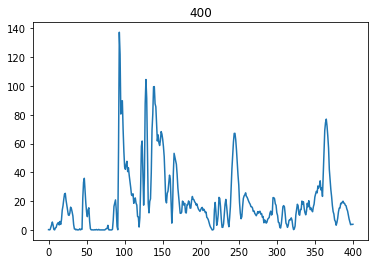

In [24]:
loss_csv = pd.read_csv('E:\\nmb\\gan_image\\csv\\loss_dcgan08.csv')
# print(loss_csv)
# print(loss_csv.shape)
 
# generator loss
plt.plot(loss_csv['g_loss'])

plt.title(epochs-1)
plt.show()

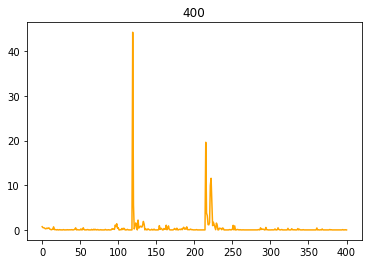

In [25]:
# discriminator loss
plt.plot(loss_csv['d_loss'], color='orange')

plt.title(epochs-1)
plt.show()